# Probability Paradoxes

Libraries needed:  
matplotlib  
tqdm (modify 'for' loops to avoid install)  

### Article Link: 

In [2]:
# Library Imports
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from tqdm import tqdm

## 1. Brithday paraodx

100%|██████████| 68/68 [00:29<00:00,  2.30it/s]


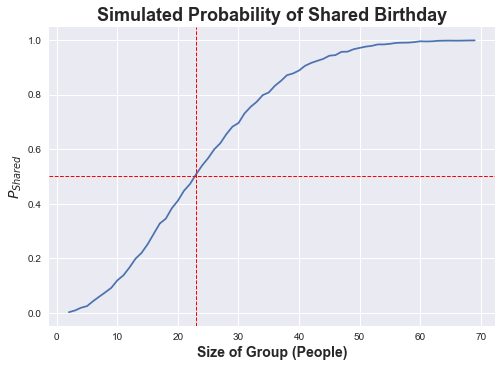

In [3]:
iteration = 10000
duplicate_rate = []
for iGroupSize in tqdm(range(2,70)):
    duplicates_counter = 0
    for i in range(iteration):
        birthdays = np.random.randint(365,size=iGroupSize) # randomize the groups birthdays from 0-364

        uniques, counts = np.unique(birthdays, return_counts=True) # Return the unique birthdays and counts of they appear
        duplicates = uniques[counts > 1] # How many duplicates, or birthdays with counts greater than 1
        duplicates_counter += np.size(duplicates)>0 # Iterate the duplicate counter if there was a duplicate

    duplicate_rate.append(duplicates_counter/iteration) # Compute the probability or fraction of iterations where duplicate occured 

# Produce the first simulation plot
plt.plot(range(2,70),duplicate_rate);
plt.axvline(x=23, color='r', linestyle='--', linewidth=1)
plt.axhline(y=0.5, color='r', linestyle='--', linewidth=1)
plt.grid(b=True) 
plt.title('Simulated Probability of Shared Birthday',fontweight='bold',fontsize = 18)
plt.xlabel('Size of Group (People)',fontweight='bold',fontsize = 14)
plt.ylabel(r'$P_{Shared}$',fontweight='bold',fontsize = 14)
plt.savefig('Images/BP_1.png')

In [4]:
n=23
1 - math.factorial(365) / (pow(365,n) * math.factorial(365-n))

0.5072972343239854

100%|██████████| 68/68 [00:00<00:00, 42048.16it/s]


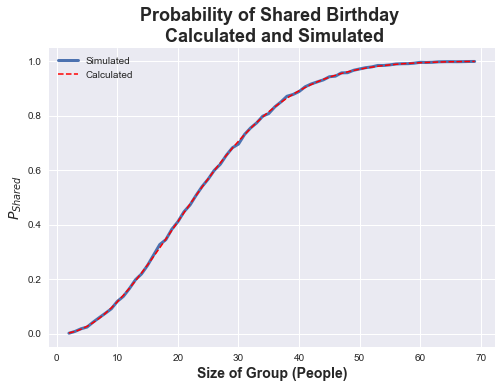

In [5]:
calc_p= []
for n in tqdm(range(2,70)):
    calc_p.append(1 - math.factorial(365) / (pow(365,n) * math.factorial(365-n)))


# Produce the first simulation plot
plt.plot(range(2,70),duplicate_rate,linewidth=3);
plt.plot(range(2,70),calc_p, linestyle='--', linewidth=1.5, c='r');
plt.grid(b=True) 
plt.title('Probability of Shared Birthday \n Calculated and Simulated',fontweight='bold',fontsize = 18)
plt.xlabel('Size of Group (People)',fontweight='bold',fontsize = 14)
plt.ylabel(r'$P_{Shared}$',fontweight='bold',fontsize = 14)
plt.legend(['Simulated','Calculated'])
plt.savefig('Images/BP_5.png',)

## 2. Simpson's Paradox

NameError: name 'fig' is not defined

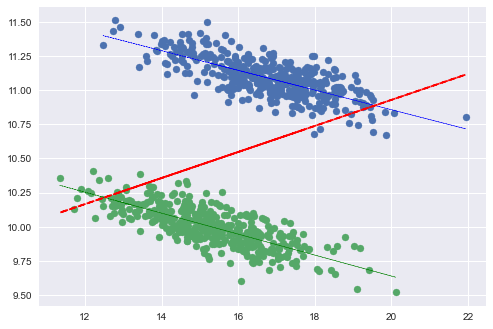

In [120]:
# Generate multivariate gaussians with correlated age and time, 
male_data = np.random.multivariate_normal([15.2,10.01],np.array([2,-0.15,-0.15,0.02]).reshape(2,2), 400)
female_data = np.random.multivariate_normal([16.8,11.09],np.array([2,-0.15,-0.15,0.02]).reshape(2,2), 400)

# Find trend line (linear fit) of each gender and combined dataset
m_female,b_female = np.polyfit(female_data[:,0],female_data[:,1],1)
m_male,b_male = np.polyfit(male_data[:,0],male_data[:,1],1)
combined_x = np.concatenate((male_data[:,0],female_data[:,0]))
combined_y = np.concatenate((male_data[:,1],female_data[:,1]))
m,b = np.polyfit(combined_x,combined_y,1)

# Plot the data as scatter and the trendlines
plt.scatter(female_data[:,0],female_data[:,1],)
plt.scatter(male_data[:,0],male_data[:,1])
plt.plot(female_data[:,0], m_female*female_data[:,0] + b_female,linestyle='--',c='b',linewidth=0.5)
plt.plot(male_data[:,0], m_male*male_data[:,0] + b_male,linestyle='--',c='g',linewidth=0.5)
plt.plot(combined_x, m*combined_x + b,linestyle='--',c='r')

plt.grid(b=True) 
plt.title('100m Time vs Age',fontweight='bold',fontsize = 18)
plt.xlabel('Age (Years)',fontweight='bold',fontsize = 14)
plt.ylabel(r'100m Time (seconds)',fontweight='bold',fontsize = 14)
plt.legend(['trend-female','trend-male','trend-combined','female','male'],loc='upper right',bbox_to_anchor=(1, 0.5))
plt.savefig('Images/BP_6.png',)

In [90]:
np.concatenate((male_data[:,0],female_data[:,0]))

(800,)